In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sys import setrecursionlimit
import threading
setrecursionlimit(10 ** 9)
threading.stack_size(67108864)

0

# **One-dimensional function minimization**


And Moses stretched out his hand over the sea, and the LORD drove the sea with a strong east wind all night, and made the sea dry land, and the waters parted. And the children of Israel went in the midst of the sea on dry land: the waters were a wall to them on the right and on the left side. 

The waters parted with Moses hand, and for his companions from the shore, the waves was described by the following function:

$y= x^2e^{sin(x)}$

So function $y=x^2e^{sinx}$ is our ${optimality \:criteria}$.


In [6]:
def func(x):
    return x ** 2 * np.e ** np.sin(x)

arg = np.linspace(-40, 40, 10000)
values = func(arg)

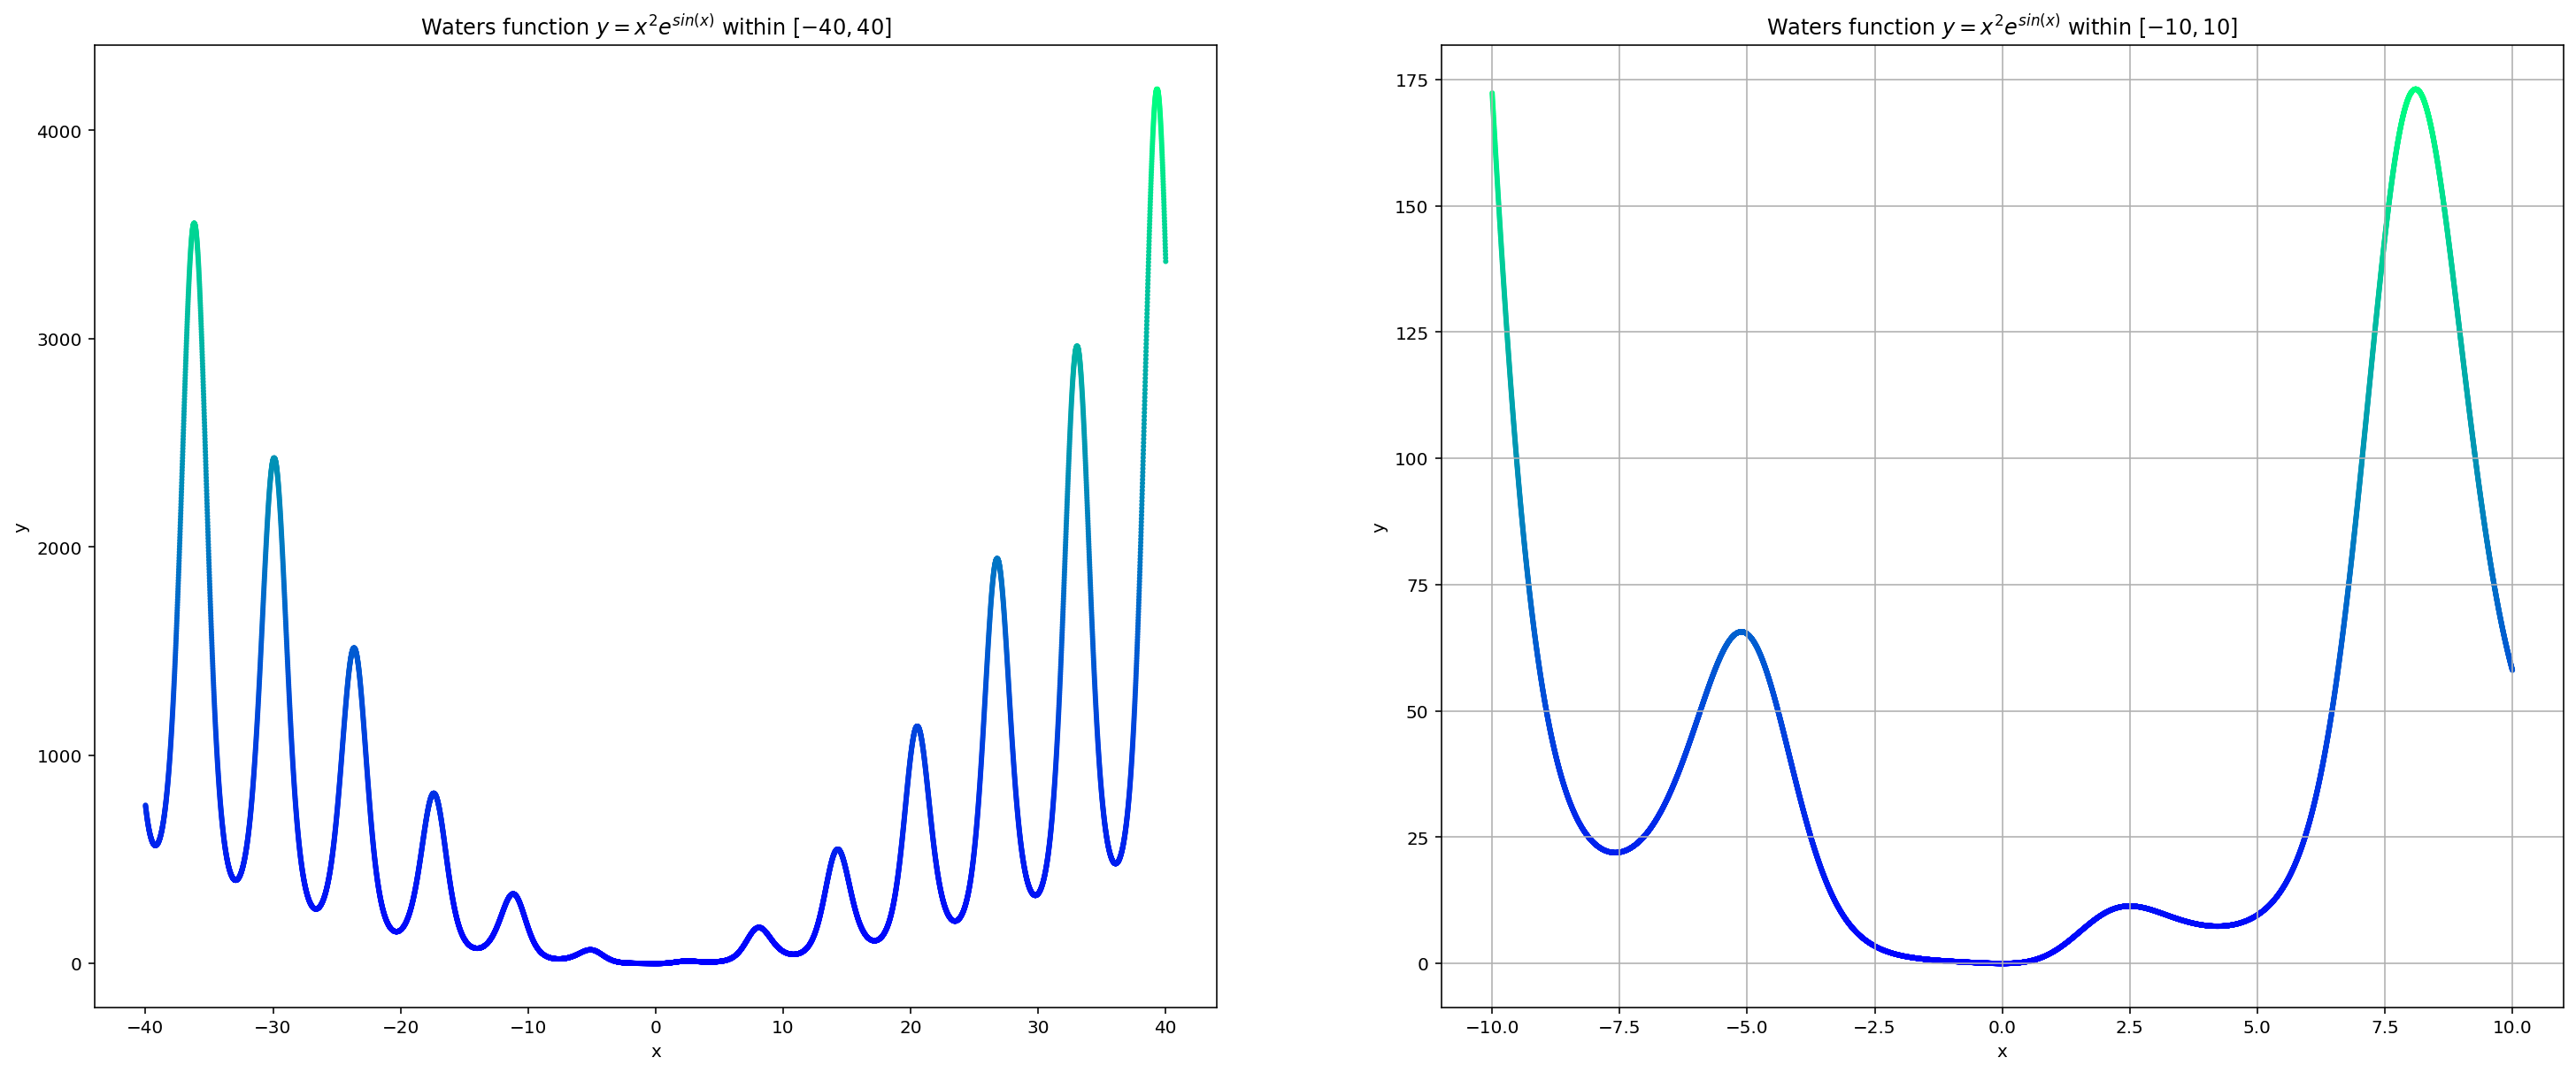

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
ax[0].scatter(x=arg,
           y=values,
           c=values,
           cmap=cm.winter,
           s=4)
ax[0].set_title("Waters function $y=x^2e^{sin(x)}$ within $[-40, 40]$")
ax[0].set(xlabel="x", ylabel="y")
arg_small = np.linspace(-10, 10, 10000)
values_small = func(np.linspace(-10, 10, 10000))
ax[1].scatter(x=arg_small,
           y=values_small,
           c=values_small,
           cmap=cm.winter,
           s=4)
ax[1].set_title("Waters function $y=x^2e^{sin(x)}$ within $[-10, 10]$")
ax[1].set(xlabel="x", ylabel="y")
plt.grid()
plt.show()

### **Dichotomic minimization**

In [8]:
eps = 10 ** -6
delta = eps / 2
left, right = -2.5, 7.5

In [9]:
def minimize_dichotomic(function, left, right, eps):
    steps = 0
    calls = 0
    history = []
    while abs(left - right) > eps:
        calls += 2
        center = (left + right) / 2
        steps += 1
        history.append([left, right, center])
        if function(center + eps) < function(center - eps):
            left, right = center, right
        elif function(center + eps) > function(center - eps):
            left, right = left, center
        else:
            left, right = center + eps, center - eps
    return (left + right) / 2, steps, history, calls


In [10]:
optima, steps, history, calls = minimize_dichotomic(func, left, right, eps)

In [11]:
print(f"Dichotomic minimization completed within {steps} steps\nComputed optimal value: {optima}\nOptimal function value: {func(optima)}")
print(f"Total function calls: {calls}")

Dichotomic minimization completed within 24 steps
Computed optimal value: 4.218436777591705
Optimal function value: 7.377709994478169
Total function calls: 48


In [12]:
def show_minimizationresults(function, optima, steps, history, minimization_type: str):
    fig, ax = plt.subplots(1, 2, figsize=(25, 10))
    ax[0].scatter(x=arg_small,
            y=values_small,
            c=values_small,
            cmap=cm.winter,
            s=4)
    ax[0].plot(optima, function(optima), 'ro', markersize=12)
    ax[0].set_title("Waters function $y=x^2e^{sin(x)}$ with optima by " + minimization_type +" minimization")
    ax[0].set(xlabel="x", ylabel="y")
    ax[1].plot([elem for elem in range(1, steps + 1)], history, 'o-', linewidth=2)
    ax[1].set_title(f"Steps of {minimization_type} minimization with left-center-right values")
    ax[1].set(xlabel="Steps", ylabel="left-center-right")
    ax[1].set_xticks([elem for elem in range(1, steps + 1)])
    plt.grid()
    plt.show()

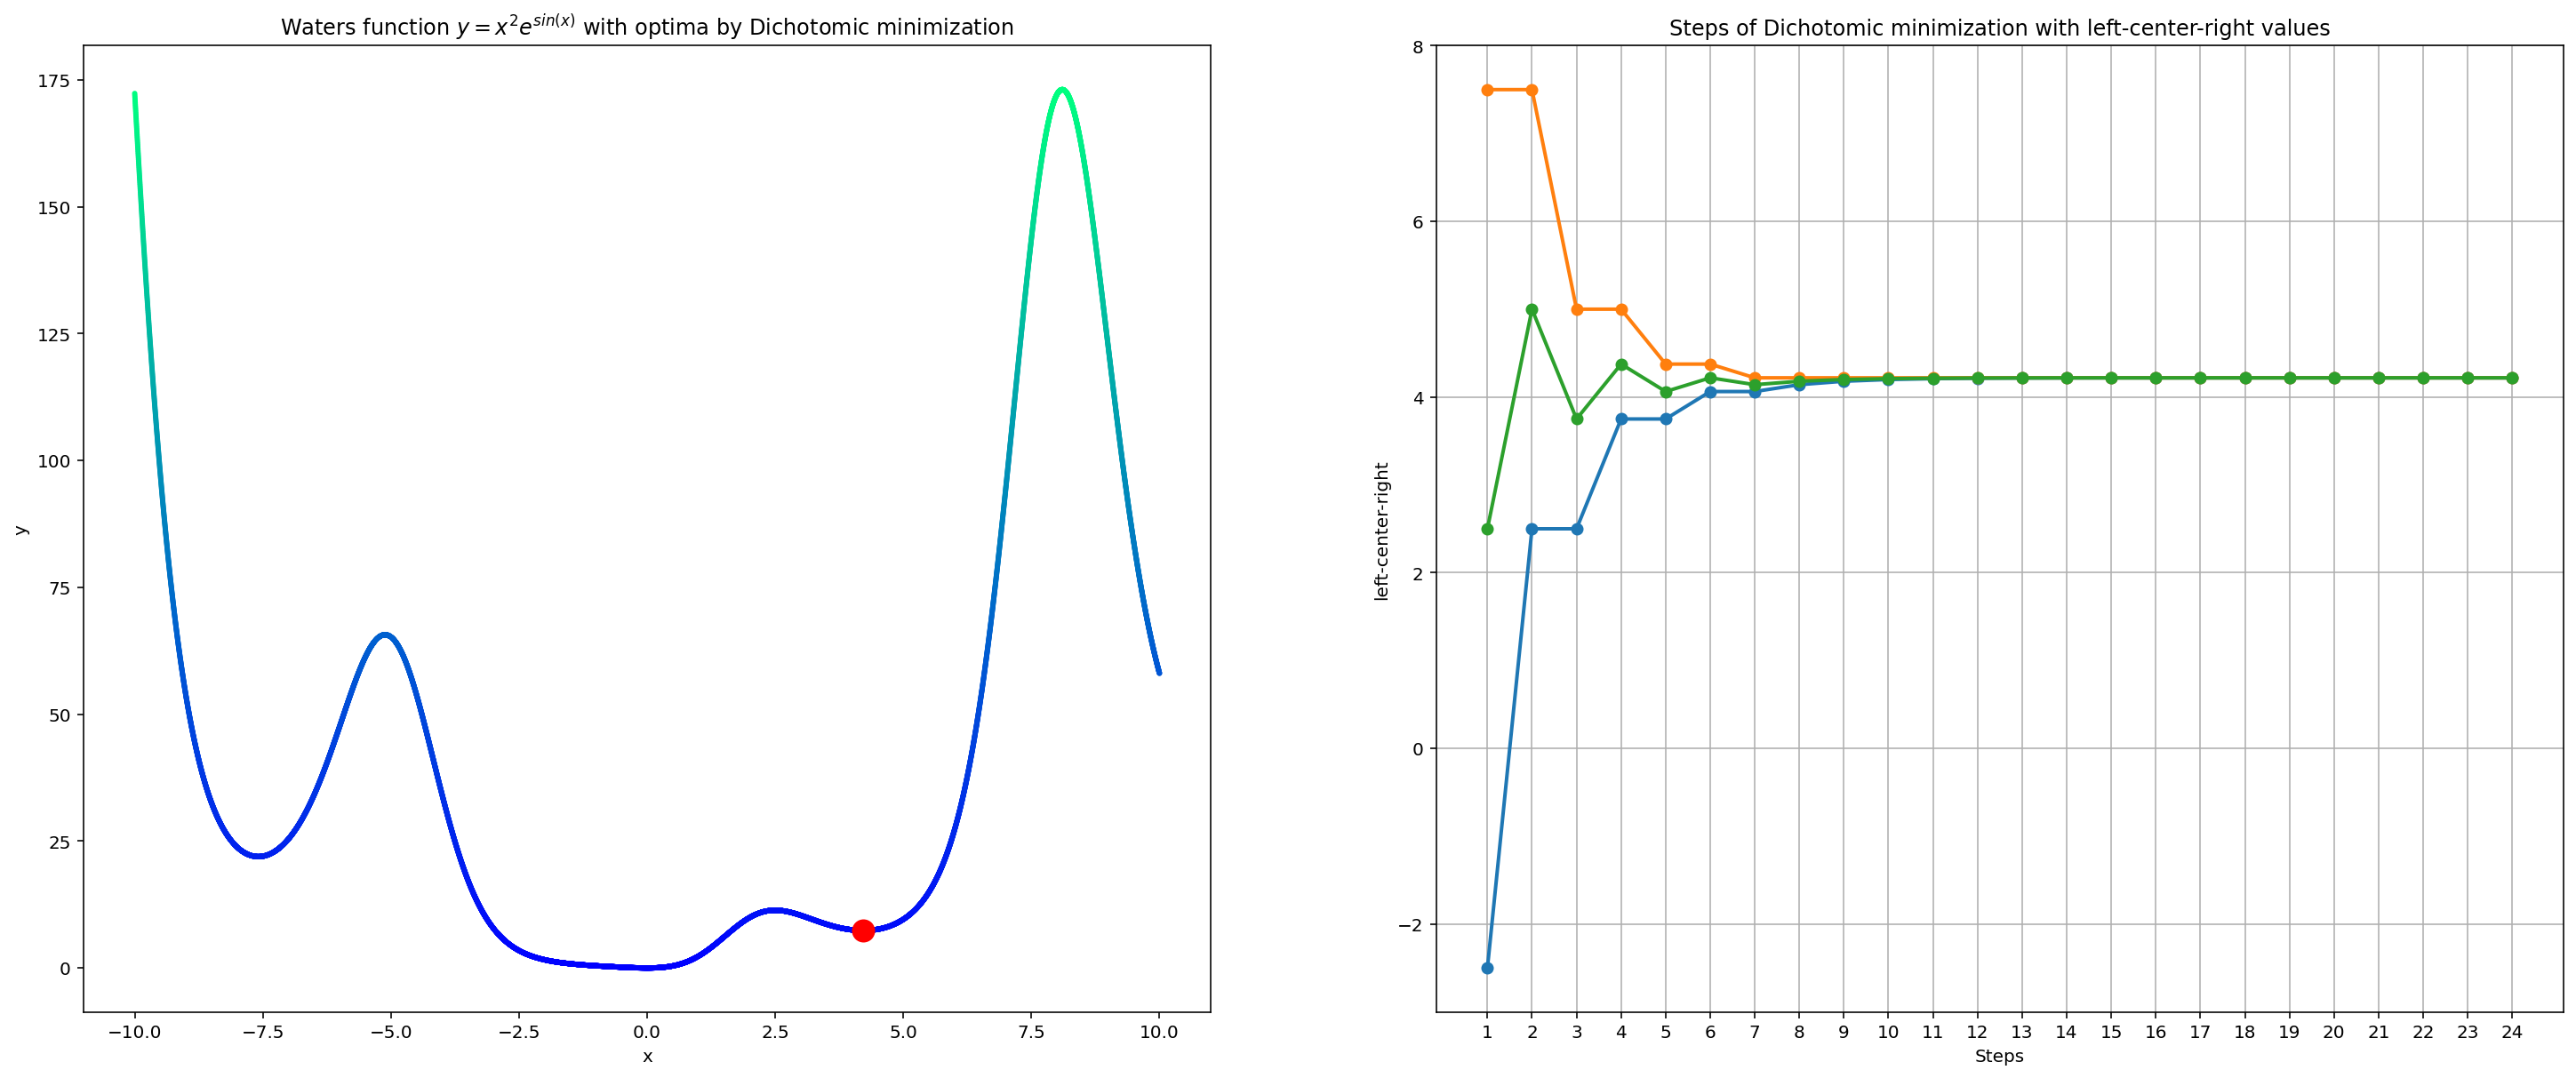

In [13]:
show_minimizationresults(func, optima, steps, history, "Dichotomic")

Let's do some testing for left-right values and find all possible grid intervals


In [14]:
leftest, rightest = -10, 10
min_step = 1
possible_pairs = [[a, b] for a in np.linspace(leftest, rightest - min_step, 20) for b in np.linspace(a + min_step, rightest, int((rightest - a) / min_step))]
print(possible_pairs)

[[-10.0, -9.0], [-10.0, -8.0], [-10.0, -7.0], [-10.0, -6.0], [-10.0, -5.0], [-10.0, -4.0], [-10.0, -3.0], [-10.0, -2.0], [-10.0, -1.0], [-10.0, 0.0], [-10.0, 1.0], [-10.0, 2.0], [-10.0, 3.0], [-10.0, 4.0], [-10.0, 5.0], [-10.0, 6.0], [-10.0, 7.0], [-10.0, 8.0], [-10.0, 9.0], [-10.0, 10.0], [-9.0, -8.0], [-9.0, -7.0], [-9.0, -6.0], [-9.0, -5.0], [-9.0, -4.0], [-9.0, -3.0], [-9.0, -2.0], [-9.0, -1.0], [-9.0, 0.0], [-9.0, 1.0], [-9.0, 2.0], [-9.0, 3.0], [-9.0, 4.0], [-9.0, 5.0], [-9.0, 6.0], [-9.0, 7.0], [-9.0, 8.0], [-9.0, 9.0], [-9.0, 10.0], [-8.0, -7.0], [-8.0, -6.0], [-8.0, -5.0], [-8.0, -4.0], [-8.0, -3.0], [-8.0, -2.0], [-8.0, -1.0], [-8.0, 0.0], [-8.0, 1.0], [-8.0, 2.0], [-8.0, 3.0], [-8.0, 4.0], [-8.0, 5.0], [-8.0, 6.0], [-8.0, 7.0], [-8.0, 8.0], [-8.0, 9.0], [-8.0, 10.0], [-7.0, -6.0], [-7.0, -5.0], [-7.0, -4.0], [-7.0, -3.0], [-7.0, -2.0], [-7.0, -1.0], [-7.0, 0.0], [-7.0, 1.0], [-7.0, 2.0], [-7.0, 3.0], [-7.0, 4.0], [-7.0, 5.0], [-7.0, 6.0], [-7.0, 7.0], [-7.0, 8.0], [-7.0, 9.0

In [15]:
optima_final, steps_final = 0, 0
pair_final = [left, right]
func_min = func(optima)
all_mins_history = []
for pair in possible_pairs:
    optima_temp, steps_temp, _, _ = minimize_dichotomic(func, pair[0], pair[1], eps)
    if func_min > func(optima_temp):
        func_min = func(optima_temp)
        optima_final, steps_final = optima_temp, steps_temp
        pair_final = pair
print("Iterative minimization boost completed!\nBest minimization results:")
print(f"\t{optima_final} - optima\t{func(optima_final)} - optimal criteria")
print(f"Interval: {pair_final}\nSteps: {steps_final}")

Iterative minimization boost completed!
Best minimization results:
	-2.9802322387695312e-08 - optima	8.88178393230346e-16 - optimal criteria
Interval: [-10.0, 1.0]
Steps: 24


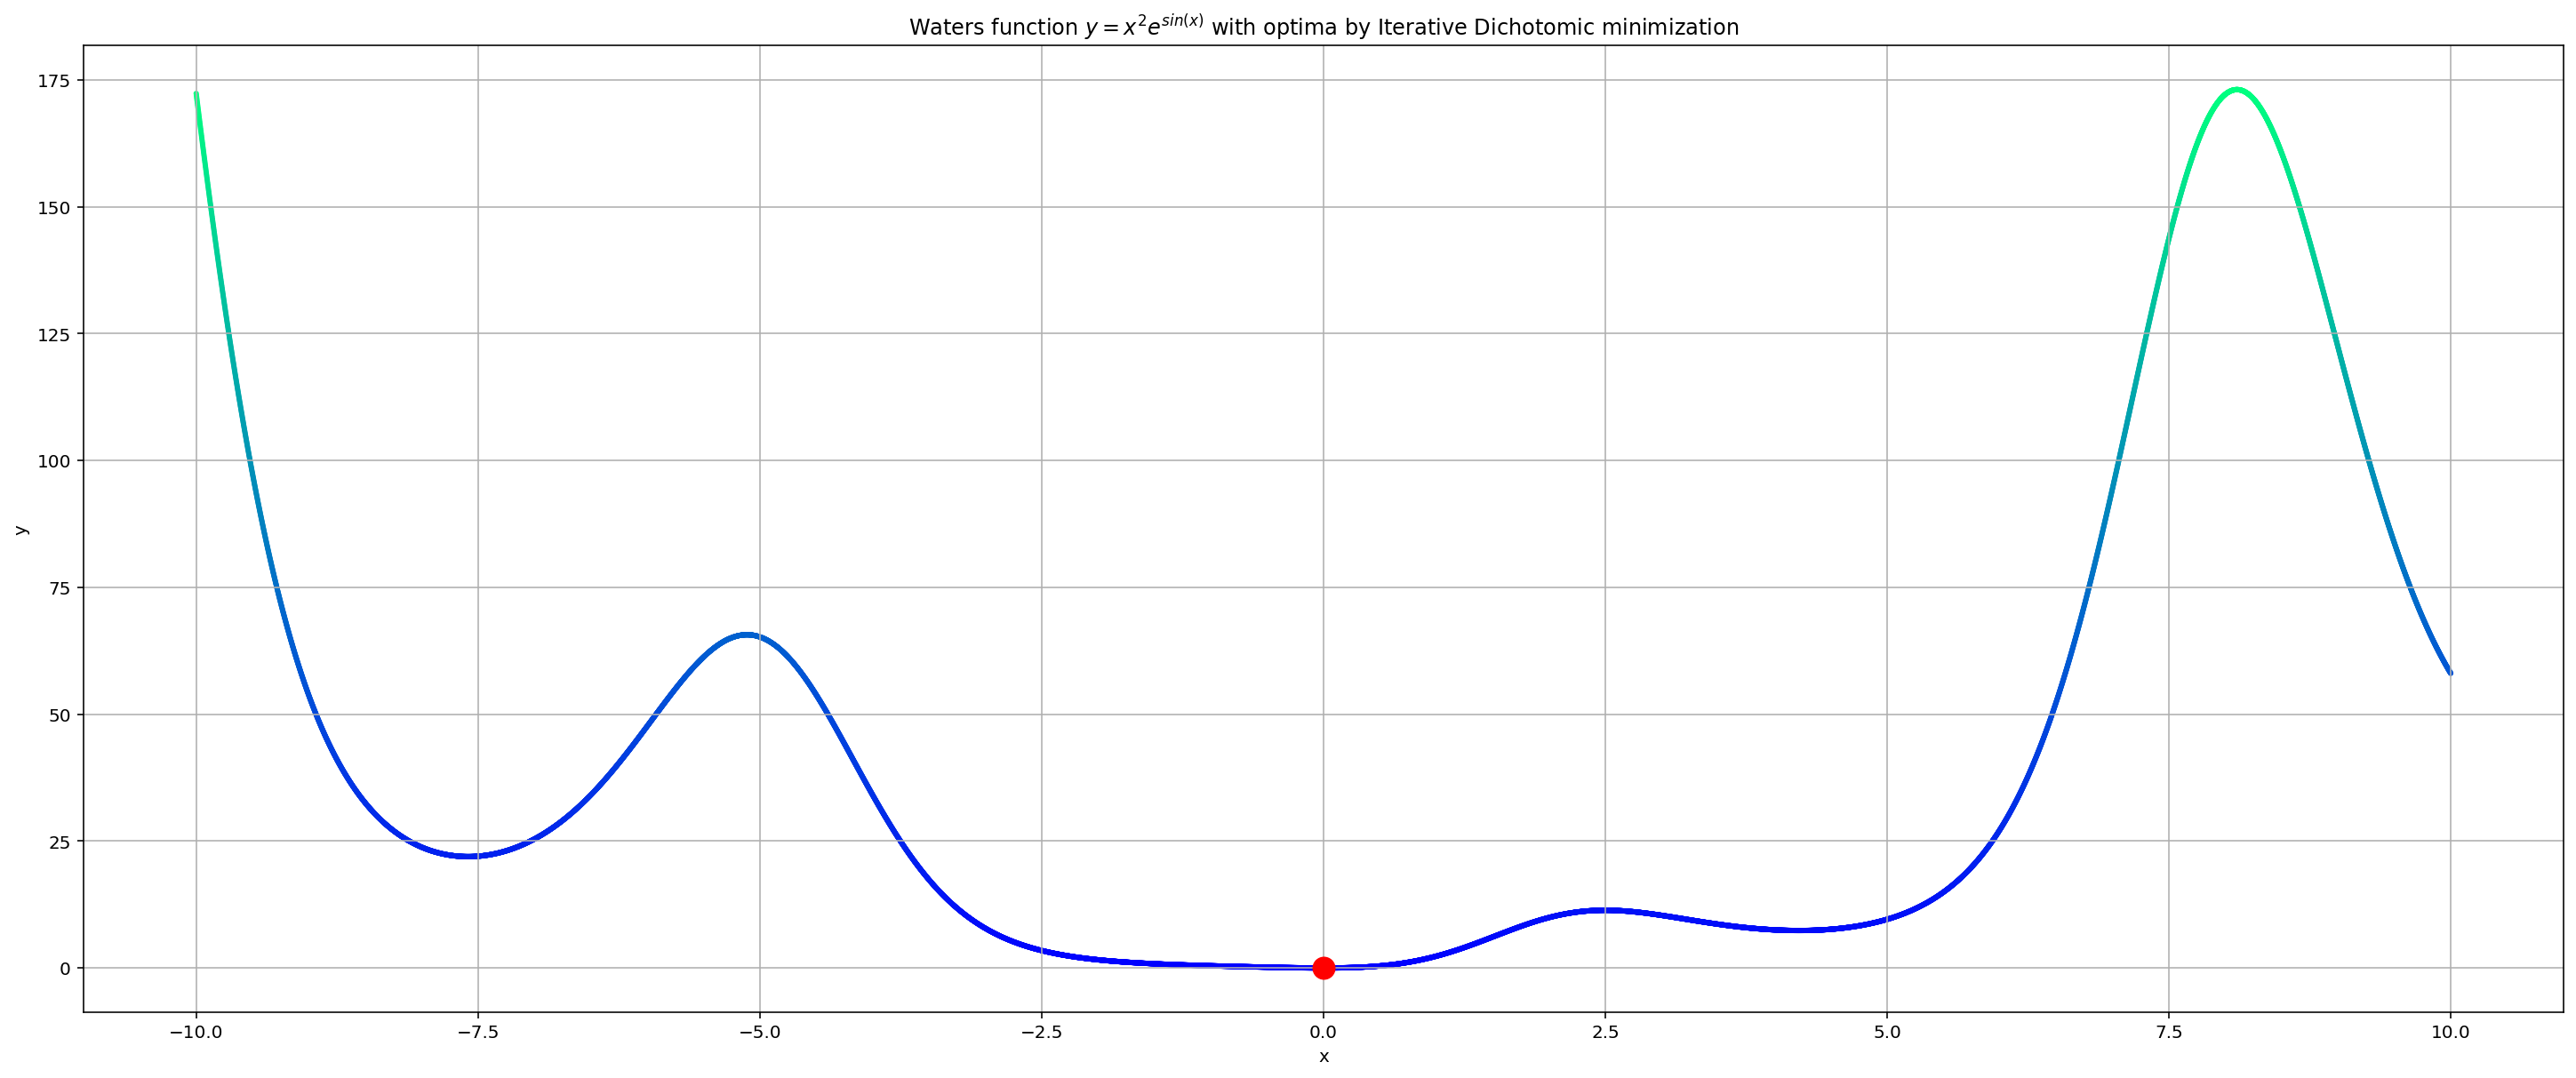

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
ax.scatter(x=arg_small,
           y=values_small,
           c=values_small,
           cmap=cm.winter,
           s=4)
ax.plot(optima_final, func(optima_final), 'ro', markersize=12)
ax.set_title("Waters function $y=x^2e^{sin(x)}$ with optima by Iterative Dichotomic minimization")
ax.set(xlabel="x", ylabel="y")
plt.grid()
plt.show()

### **The golden ratio minimization**




In [17]:
def minimize_goldenratio(function, left, right, eps):
    steps, calls, history = 0, 0, []
    alpha = (3 - math.sqrt(5)) / 2
    subleft = left + (right - left) * alpha
    subright = right - (right - left) * alpha
    value_left, value_right = function(subleft), function(subright)
    calls += 2
    while abs(left - right) > eps:
        steps += 1
        history.append([left, right, subleft, subright])
        if value_left >= value_right:
            left = subleft
            subleft = subright
            subright = right - (right - left) * alpha
            value_left, value_right = value_right, function(subright)
            calls += 1
        else:
            right = subright
            subright = subleft
            subleft = left + (right - left) * alpha
            value_left, value_right = function(subleft), value_left
            calls += 1

    return (left + right) / 2, steps, history, calls

In [18]:
optima_goldenratio, steps_goldenratio, history_goldenratio, calls_goldenratio = minimize_goldenratio(func, left, right, eps)

In [19]:
print(f"Golden Ratio minimization completed within {steps_goldenratio} steps\nComputed optimal value: {optima_goldenratio}\nOptimal function value: {func(optima_goldenratio)}")
print(f"Total function calls: {calls_goldenratio}")

Golden Ratio minimization completed within 34 steps
Computed optimal value: -1.6744414365718577e-07
Optimal function value: 2.8037536550366574e-14
Total function calls: 36


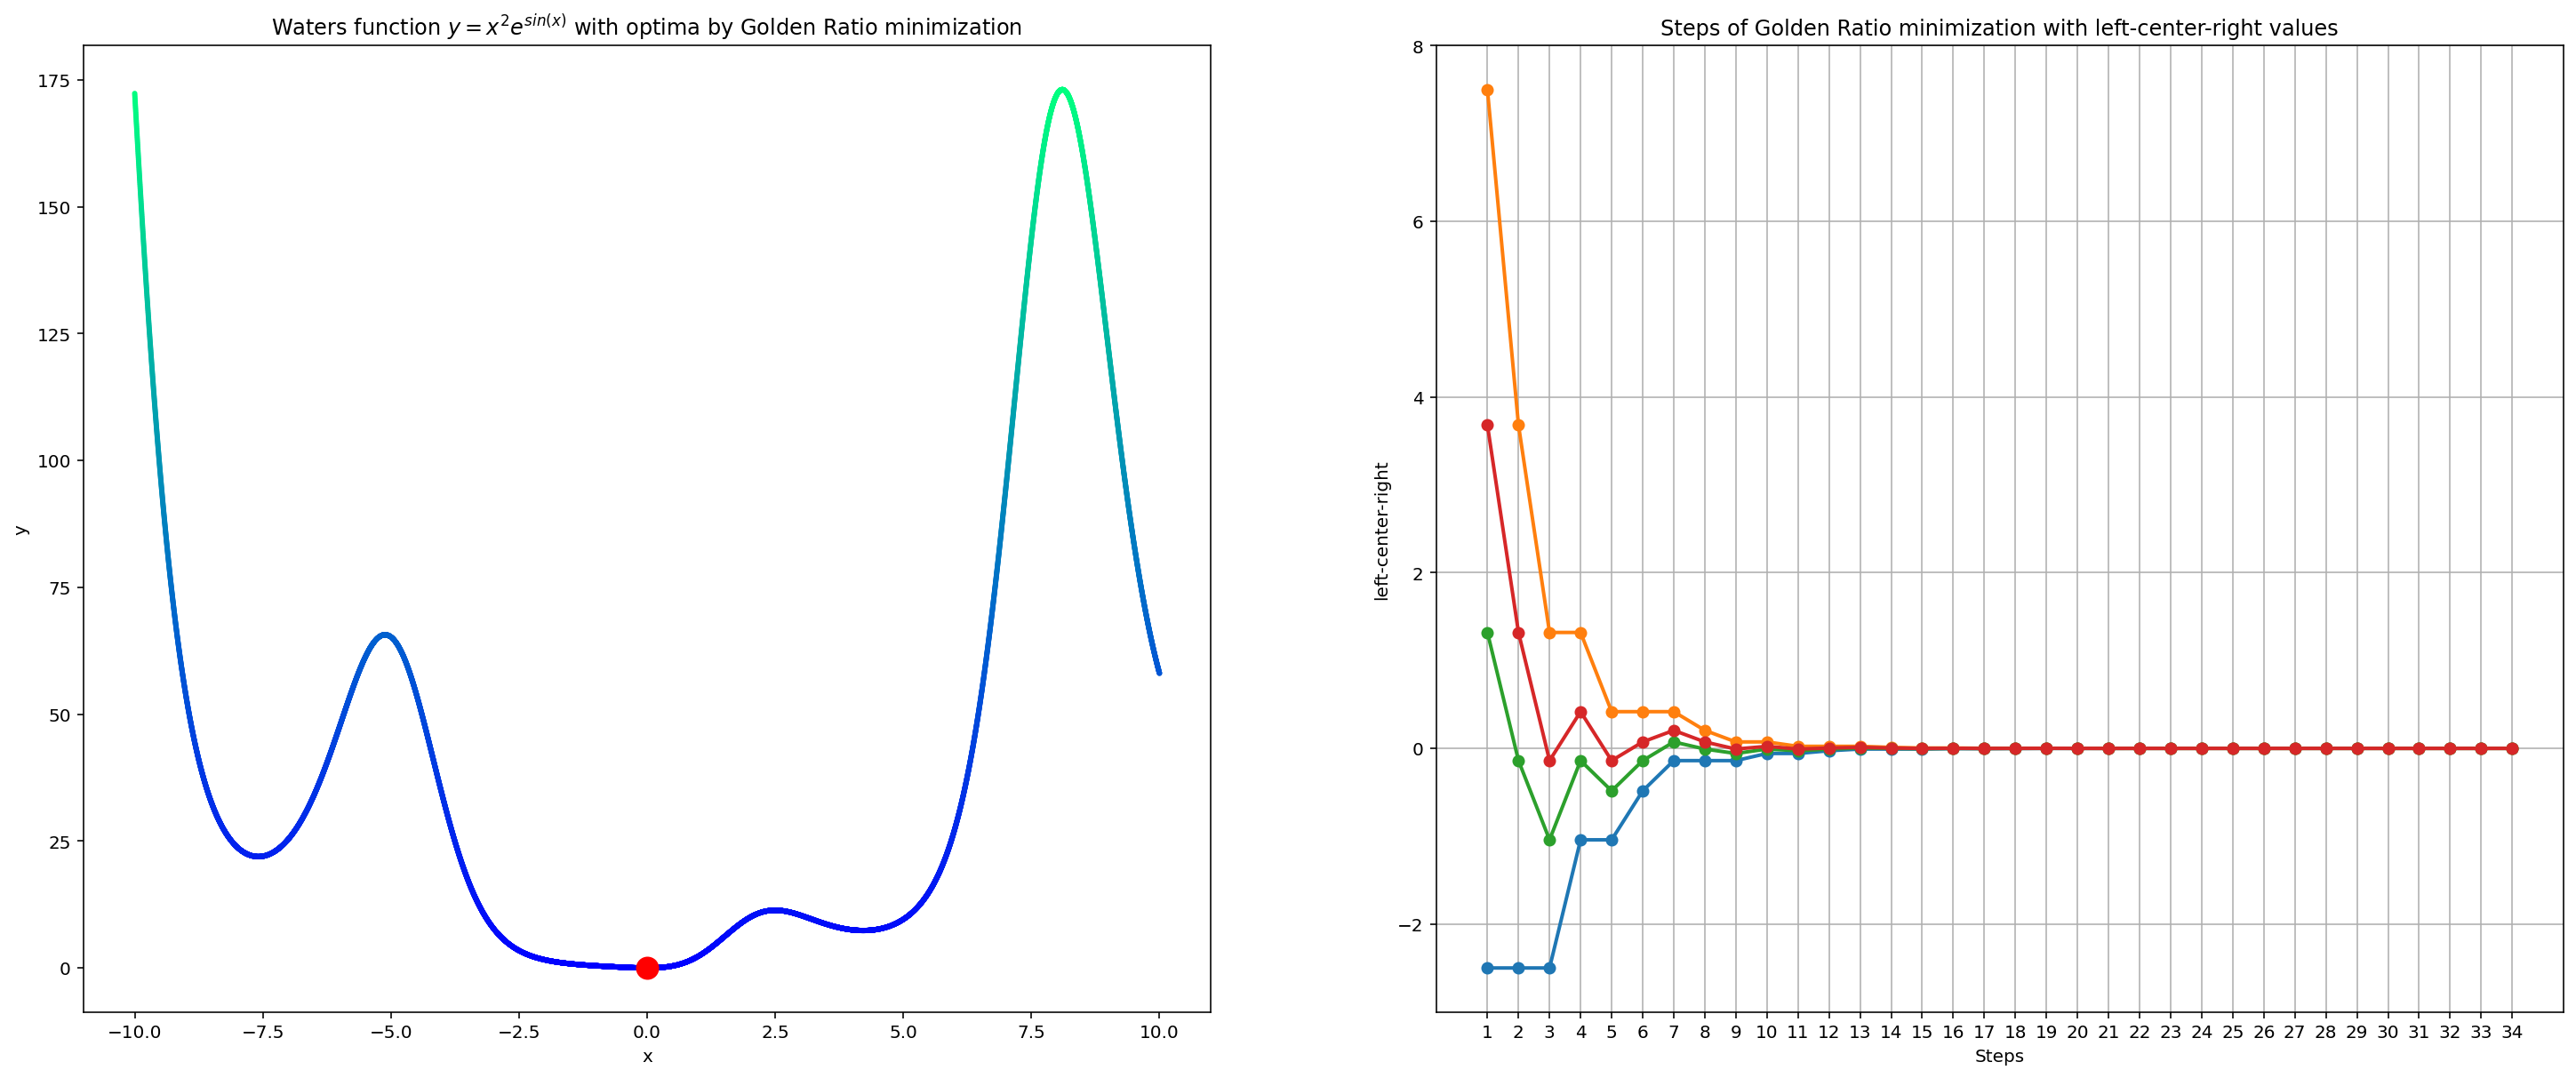

In [20]:
show_minimizationresults(func, optima_goldenratio, steps_goldenratio, history_goldenratio, "Golden Ratio")

### **Fibonacci minimization**

In [21]:
def get_fibonacci(n):
    f1, f2 = 0, 1
    for _ in range(n):
        f1, f2 = f2, f1 + f2
    return f1

def get_closest_fibonacci_num(N):
    f1, f2, cnt = 0, 1, 0
    while f1 < N:
        cnt += 1
        f1, f2 = f2, f1 + f2
    return cnt

In [26]:
def minimize_fibonacci(function, left, right, eps):
    steps, calls, history = 0, 0, []
    start_index = get_closest_fibonacci_num(abs(left - right) / eps)
    start_fib, prepre_fib = get_fibonacci(start_index), get_fibonacci(start_index - 2)
    alpha = prepre_fib / start_fib
    subleft = left + (right - left) * alpha
    subright = right - (right - left) * alpha
    value_left, value_right = function(subleft), function(subright)
    calls += 2
    while steps != start_index - 2:
        steps += 1
        history.append([left, right, subleft, subright])
        if value_left >= value_right:
            left = subleft
            subleft = subright
            subright = right - (right - left) * get_fibonacci(start_index - steps - 2) / get_fibonacci(start_index - steps)
            value_left, value_right = value_right, function(subright)
            calls += 1
        else:
            right = subright
            subright = subleft
            subleft = left + (right - left) * get_fibonacci(start_index - steps - 2) / get_fibonacci(start_index - steps)
            value_left, value_right = function(subleft), value_left
            calls += 1
    return (left + right) / 2, steps, history, calls

In [31]:
optima_fib, steps_fib, history_fib, calls_fib = minimize_fibonacci(func, left, right, eps)

In [32]:
print(f"Fibonacci minimization completed within {steps_fib} steps\nComputed optimal value: {optima_fib}\nOptimal function value: {func(optima_fib)}")
print(f"Total function calls: {calls_fib}")

Fibonacci minimization completed within 34 steps
Computed optimal value: 3.348882866291291e-07
Optimal function value: 1.1215020207917645e-13
Total function calls: 36


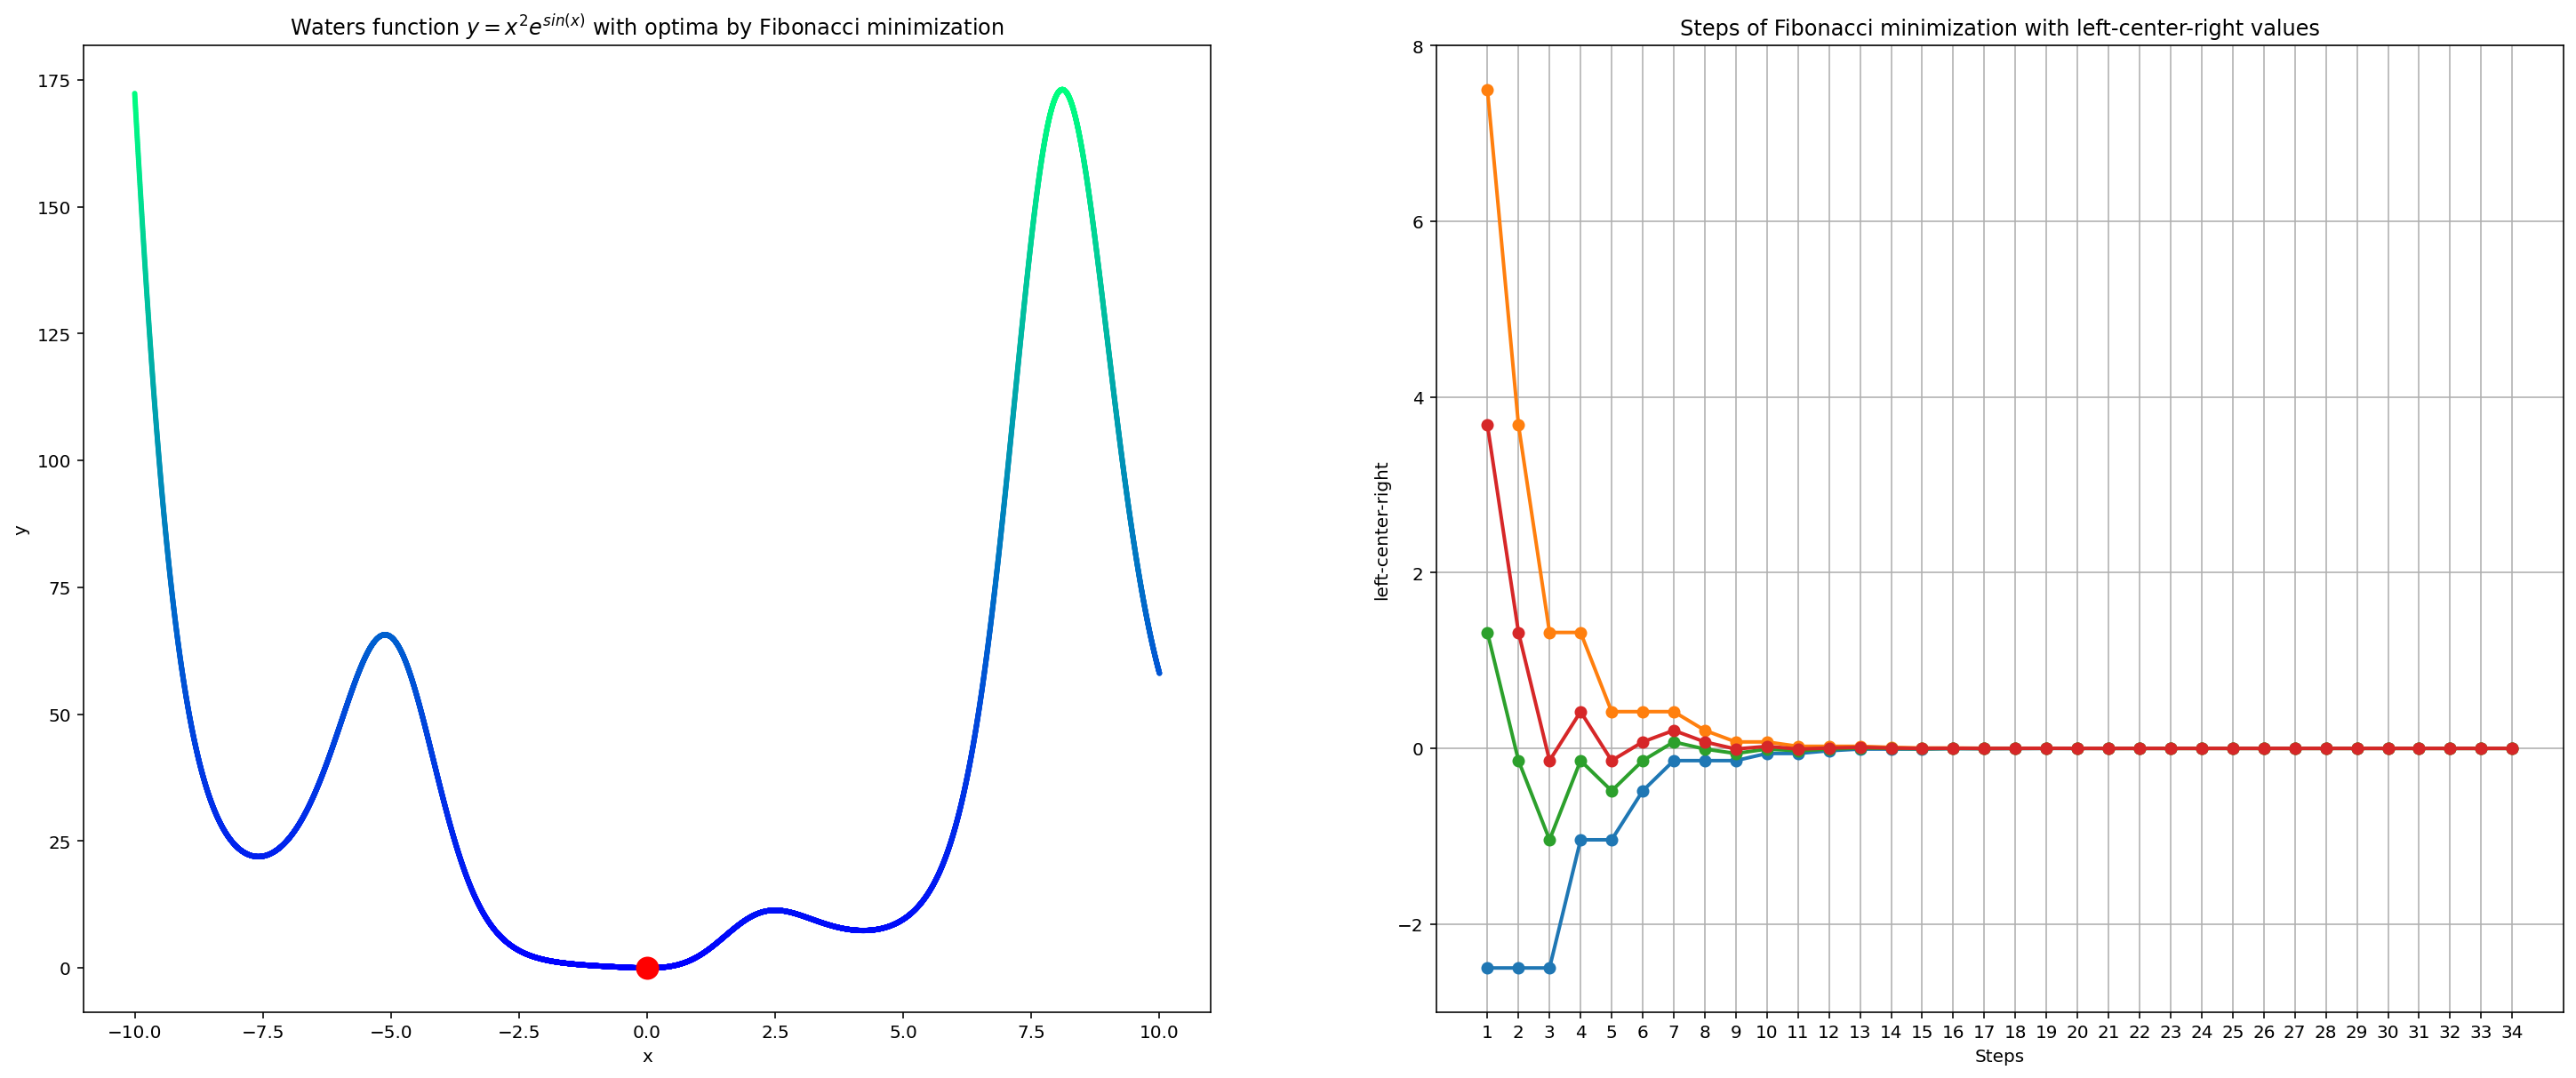

In [33]:
show_minimizationresults(func, optima_fib, steps_fib, history_fib, "Fibonacci")

### **Parabolic minimization**

Interpolation with:

$p(x)=ax^2+bx+c$

$\left\{\begin{matrix}
ax_1^2+bx_1+c=f(x_1) \\ ax_2^2+bx_2+c=f(x_2)\\ax_3^2+bx_3+c=f(x_3)
\end{matrix}\right.$

$\left\{\begin{matrix}
a(x_1^2-x_2^2)+b(x_1-x_2)=f(x_1)-f(x_2) \\ a(x_2^2-x_3^2)+b(x_2-x_3)=f(x_2)-f(x_3)
\end{matrix}\right.$

$\begin{pmatrix}x_1^2-x_2^2 & x_1-x_2 \\ x_2^2-x_3^2 & x_2-x_3 \\ \end{pmatrix} \cdot \begin{pmatrix} a \\ b \\ \end{pmatrix} = \begin{pmatrix} f(x_1)-f(x_2)  \\f(x_2)-f(x_3)\\ \end{pmatrix}$

$\begin{pmatrix} a \\ b \\ \end{pmatrix} = \begin{pmatrix}x_1^2-x_2^2 & x_1-x_2 \\ x_2^2-x_3^2 & x_2-x_3 \\ \end{pmatrix}^{-1} \cdot \begin{pmatrix} f(x_1)-f(x_2)  \\ f(x_2)-f(x_3)\\ \end{pmatrix} = \begin{pmatrix}x_2-x_3 & x_2-x_1 \\ x_3^2-x_2^2 & x_1^2-x_2^2 \\ \end{pmatrix} \cdot \begin{pmatrix} f(x_1)-f(x_2)  \\ f(x_2)-f(x_3)\\ \end{pmatrix}$

$\begin{pmatrix} a \\ b \\ \end{pmatrix} = \begin{pmatrix} (f(x_1)-f(x_2))(x_2-x_3) + (f(x_2)-f(x_3))(x_2-x_1) \\ (f(x_1)-f(x_2))(x_3^2-x_2^2) + (f(x_2)-f(x_3))(x_1^2-x_2^2)\end{pmatrix}$

$x_{min}=\frac{-b}{2a} = - \frac{1}{2} \cdot \frac{(f(x_1)-f(x_2))(x_3^2-x_2^2) + (f(x_2)-f(x_3))(x_1^2-x_2^2)}{(f(x_1)-f(x_2))(x_2-x_3) + (f(x_2)-f(x_3))(x_2-x_1)}$

In [132]:
def get_xmin(x1, f1, x2, f2, x3, f3):
    f12, f23 = f1 - f2, f2 - f3
    x21, x23 = x2 - x1, x2 - x3
    xsq32, xsq12 = x3 ** 2 - x2 ** 2, x1 ** 2 - x2 ** 2
    return -0.5 * (f12 * xsq32 + f23 * xsq12) / (f12 * x23 + f23 * x21)

def minimize_parabolic(function, left, right, eps):
    steps, calls, history = 0, 0, []
    center = (left + right) / 2
    value_left, value_center, value_right = function(left), function(center), function(right)
    calls += 3
    while value_left < value_center or value_right < value_center:
        if value_center > value_left:
            right = center
            value_right = value_center
            center = (left + right) / 2
            value_center = function(center)
            calls += 1
        elif value_center > value_right:
            left = center
            value_left = value_center
            center = (left + right) / 2
            value_center = function(center)
            calls += 1
        else:
            break
    # x_min in [left, right]
    # f(center) < f(left), f(right)
    x_min = get_xmin(left, value_left, center, value_center, right, value_right)
    while True:
        steps += 1
        history.append([left, right, center, x_min])
        value_x_min = function(x_min)
        calls += 1
        if left < x_min < center and value_x_min > value_center:
            left, value_left = x_min, value_x_min
        elif left < x_min < center and value_x_min < value_center:
            right, value_right = center, value_center
            center, value_center = x_min, value_x_min
        elif center < x_min < right and value_x_min > value_center:
            right, value_right = x_min, value_x_min
        elif center < x_min < right and value_x_min < value_center:
            left, value_left = center, value_center
            center, value_center = x_min, value_x_min
        x_min_new = get_xmin(left, value_left, center, value_center, right, value_right)
        if abs(x_min - x_min_new) <= eps:
            return x_min, steps, history, calls
        x_min = x_min_new

In [136]:
optima_parabolic, steps_parabolic, history_parabolic, calls_parabolic = minimize_parabolic(func, left, right, eps)
# optima_parabolic_test, steps_parabolic_test, history_parabolic_test, calls_parabolic_test = minimize_parabolic(func, -2, 3, eps)

In [137]:
print(f"Parabolic minimization completed within {steps_parabolic} steps\nComputed optimal value: {optima_parabolic}\nOptimal function value: {func(optima_parabolic)}")
print(f"Total function calls: {calls_parabolic}")

Parabolic minimization completed within 11 steps
Computed optimal value: -4.173452930177039e-07
Optimal function value: 1.741770209120581e-13
Total function calls: 15


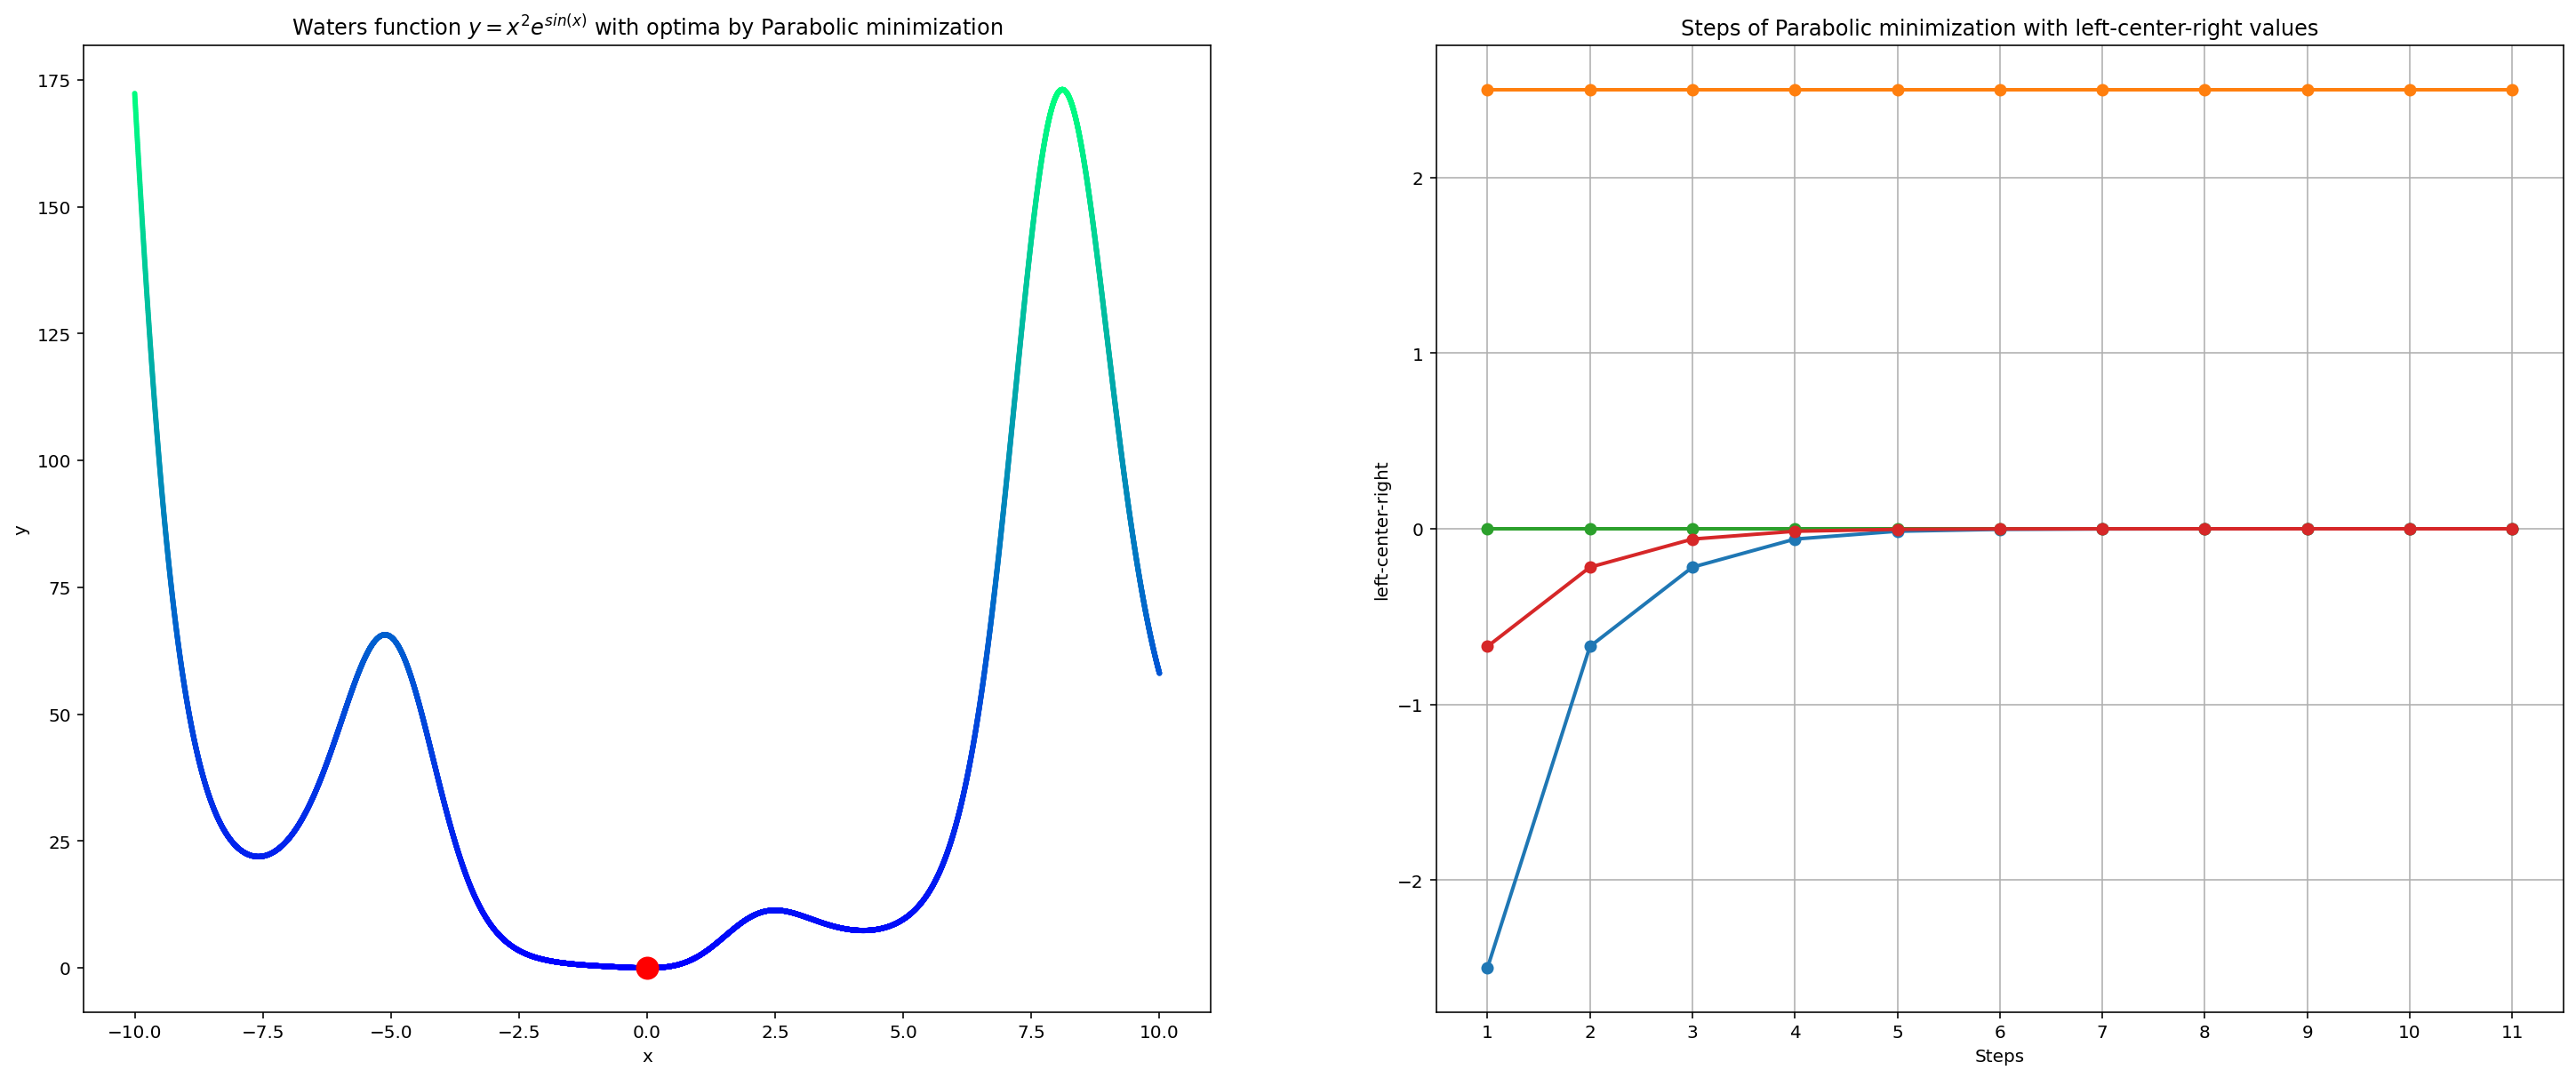

In [138]:
show_minimizationresults(func, optima_parabolic, steps_parabolic, history_parabolic, "Parabolic")
# show_minimizationresults(func, optima_parabolic_test, steps_parabolic_test, history_parabolic_test, "ParabolicTest")

### **Brent combined minimization**